In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

# Clustering

## K-Means

This time we will use a "real" dataset, the iris dataset. It contains data about three different types of iris (setosa, versicolor, and virginica). Each point has four dimension, representing the sepal length, the sepal width, the petal length and the petal width (in centimeters).

We can load this dataset directly from scikit-learn.

In [2]:
from sklearn import datasets
iris_dataset = datasets.load_iris()

In [3]:
iris_dataset.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
X_iris, y_iris = iris_dataset.data, iris_dataset.target
print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


Let's quickly visualize this dataset using only the first two dimensions.

In [6]:
# We create a custom "colormap" so that elements with label 0 have color blue,
# elements with label 1 have color red and elements with label 2 have color green in our figure below.
from matplotlib.colors import ListedColormap
colormap = ListedColormap(['blue', 'red', 'green'])

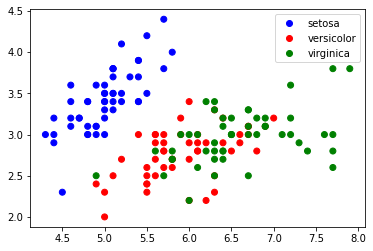

In [7]:
scatter = plt.scatter(X_iris[:,0], X_iris[:,1], c=y_iris, cmap=colormap)
plt.legend(scatter.legend_elements()[0], iris_dataset.target_names)
plt.show()

Now let's assume we don't have access to the labels, and see if we can still identify some structure in the dataset.

**Implement the K-Means algorithm and run it on the whole iris dataset using K=3.**

As all the features have roughly the same scale, we will consider there is no need to standardize features here.

In [8]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [9]:
initialize_centroids(X_iris,3)

array([[5.1, 2.5, 3. , 1.1],
       [5.7, 2.8, 4.1, 1.3],
       [5.9, 3. , 5.1, 1.8]])

In [10]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [11]:
c = initialize_centroids(X_iris, 3)
closest_centroid(X_iris, c)

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [13]:
move_centroids(X_iris, closest_centroid(X_iris, c), c)

array([[6.32105263, 2.89894737, 4.98947368, 1.71052632],
       [5.48181818, 3.87272727, 1.48181818, 0.25454545],
       [4.90227273, 3.19545455, 1.66818182, 0.33181818]])

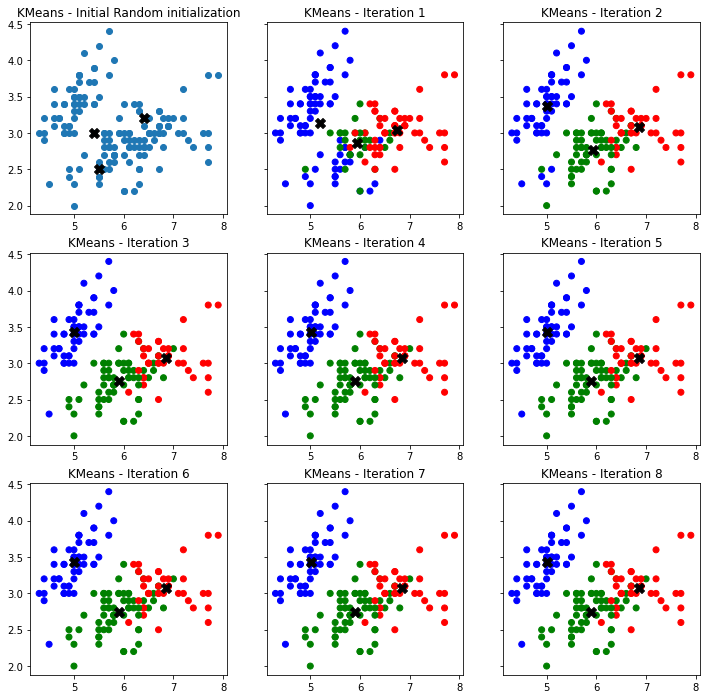

In [14]:
f, axs = plt.subplots(3, 3, sharey=True,figsize=(12,12))
            
for i in range(3):
    for j in range(3):
        if i==0 and j==0:
            axs[i,j].set_title('KMeans - Initial Random initialization')
            axs[i,j].scatter(X_iris[:, 0], X_iris[:, 1])
            centroids = initialize_centroids(X_iris, 3)
            axs[i,j].scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100)
        else:
            axs[i,j].set_title("KMeans - Iteration {}".format(3*i+j))
            closest = closest_centroid(X_iris, centroids)
            centroids = move_centroids(X_iris, closest, centroids)
            axs[i,j].scatter(X_iris[:, 0], X_iris[:, 1],c=closest, cmap=colormap)
            axs[i,j].scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100)

**Display only the first 2 dimensions as in the figure above, and color points based on their assigned clusters. Do you have a result consistent with the figure above?**

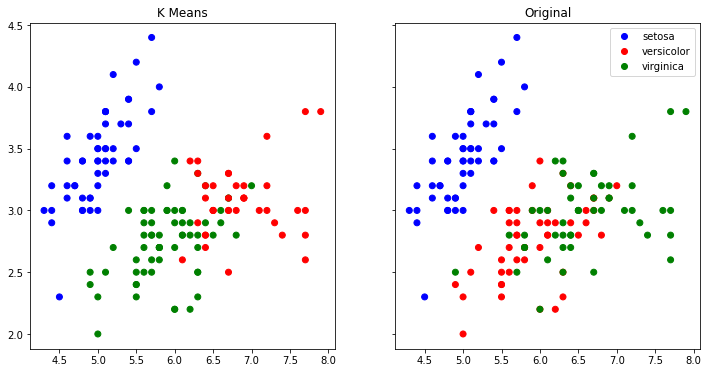

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,6))
ax1.set_title('K Means')
ax1.scatter(X_iris[:,0],X_iris[:,1],c=closest,cmap=colormap)
ax2.set_title("Original")
plt.legend(scatter.legend_elements()[0], iris_dataset.target_names)
ax2.scatter(X_iris[:,0],X_iris[:,1],c=y_iris,cmap=colormap)

- Yes, the result is consistent with the original data. By using 3 clusters in the K-means algorithm we were able to achieve a fairly similar clustering graph. 
- Because it is an unsupervised algorithm the algorithm didn't have a way to match exactly the output values. That explains why some colors are switched in the results of the K means algorithm compared to the original data. Nevertheless, the clusters identified are very clear and similar.

Now you may use the scikit-learn implementation sklearn.cluster.KMeans if you wish (you don't have to, but it will probably be easier with this class).

**Plot the "inertia" with respect to the number of clusters after running KMeans with different numbers of clusters. Here, "inertia" means the objective $\sum_{n=1}^N \lVert \mathbf{x}_n - \mathbf{c}_{a(\mathbf{x}_n)}\rVert_2^2$**

You don't have to compute the inertia manually, there is a way to obtain it directly if you look at the documentation of the class sklearn.cluster.KMeans.

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans = KMeans(n_clusters=3)

In [18]:
kmeans.fit(X_iris)

KMeans(n_clusters=3)

In [19]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [20]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [22]:
#Inertia
kmeans.inertia_

78.851441426146

In [23]:
def run_multiple_K_means(X_data):
    array_n_cluster = []
    array_inertia = []
    for n in range(2,15):
        array_n_cluster.append(int(n))
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X_data)
        array_inertia.append(kmeans.inertia_) 
    return array_n_cluster, array_inertia

In [24]:
n_cluster, inertia = run_multiple_K_means(X_iris)

Text(0, 0.5, 'Inertia')

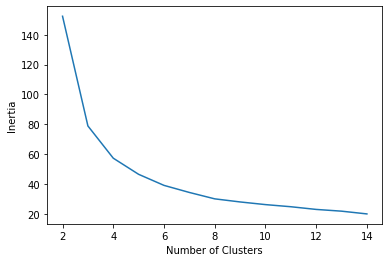

In [25]:
plt.plot(n_cluster,inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

**If we didn't know how many clusters we needed, could be infer this number from this figure?**

- Yes, we could say that a number of clusters around 3 is a good solution (elbow method)

**Did you think about running KMeans several times to make sure we don't obtain different results (and thus different inertia) for a given number of clusters?**

- KMeans lead to different results if different initial centroids are defined. When implementing the algorithm we initialized randomly the centroids, therefore our results (and inertia) were different each time.
- However, when using the Scikit-learn implementation we are letting KMeans to select the centroids for us based on the lowest inertia. For doing this it uses the parameter n_init (Number of time the k-means algorithm will be run with different centroid seeds), which is set to 10 by default, and chooses the one that yields the lowest inertia.

## Probably not K-Means

Let's go back to generating some data.

In [26]:
X_moons, y_moons = sklearn.datasets.make_moons(n_samples=200, shuffle=True, noise=0.05, random_state=42)

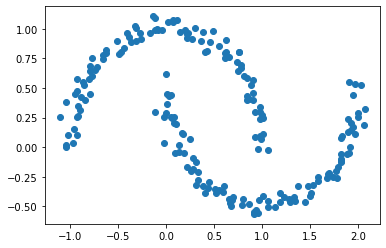

In [27]:
plt.scatter(X_moons[:,0], X_moons[:,1])
plt.show()

**How many groups of points would a human probably identify here?**

- Probably two. One for each arc

**Use a suitable clustering algorithm to assign each point to a cluster. Plot the result.**

You can consider that we know in advance how many clusters we want to obtain. You can (and maybe should) use an existing implementation.

In [28]:
#Hierarchical Clustering
Agglo = sklearn.cluster.AgglomerativeClustering(n_clusters=2,linkage='single')

In [29]:
Agglo.fit(X_moons)

AgglomerativeClustering(linkage='single')

In [30]:
Agglo.labels_

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0], dtype=int64)

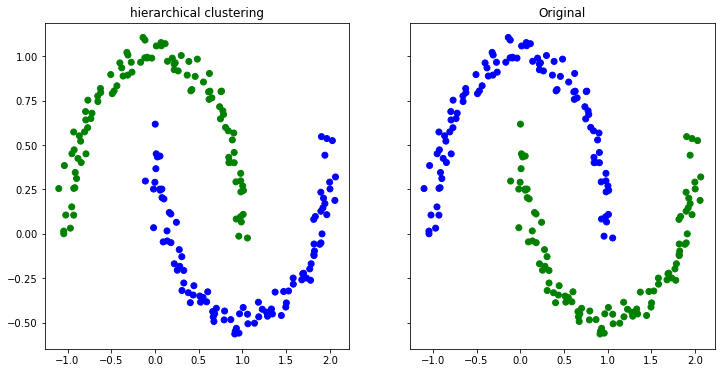

In [31]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,6))
ax1.set_title('hierarchical clustering')
ax1.scatter(X_moons[:,0],X_moons[:,1],c=Agglo.labels_,cmap=colormap)
ax2.set_title("Original")
ax2.scatter(X_moons[:,0],X_moons[:,1],c=y_moons,cmap=colormap)

# Dimensionality reduction

## Data visualization

We will now use the MNIST dataset. It consists of 28x28 pixels images of handwritten digits. We can directly download it in vector form from the scikit-learn API.

In [32]:
from sklearn.datasets import fetch_openml

In [33]:
%%time
# It may take up to a few minutes depending on the speed of the Internet connection, and the speed of your computer.
X_mnist, y_mnist = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X_mnist.shape, y_mnist.shape)

(70000, 784) (70000,)
Wall time: 20.1 s


Let's have a look at the first image.

In [34]:
index = 0

In [35]:
print(X_mnist[index].shape)
print(y_mnist[index])

(784,)
5


It represents a five. It has an initial shape of 784, so we need to reshape it to correspond to an image.

In [36]:
img0 = X_mnist[index].reshape(28,28)

We can now display it.

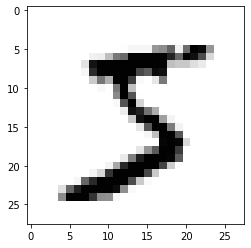

In [37]:
plt.imshow(img0, cmap=plt.cm.Greys)
plt.show()

You can have a look at a few other images if you want to.

Using all the 70,000 images may be a bit too much for some algorithms below. We will thus sample a subset of this dataset to speed up calculations.

In [38]:
# You can change this number depending on the speed of your computer.
# Try not to decrease it too much if you still want to get meaningful results.
N = 1000
X_samples = X_mnist[:N]
y_samples = y_mnist[:N]
X_samples.shape

(1000, 784)

We sampling data like this, it is important to check that the data has been shuffled. We wouldn't want to use 1000 images representing only the digit '0' for instance.

In [39]:
# The y_mnist array initially contains strings, we convert them to ints.
y_samples = np.array([int(s) for s in y_samples])

In [40]:
#Making sure we had our data shuffle
y_samples

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2,
       9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4,
       5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9,
       9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5,
       9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8,
       3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3, 0, 4, 6, 5,
       2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5, 8, 6,
       3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7,
       9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9,
       6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6, 8,

**Visualize the dataset in 2D using PCA. Display the digits as different colors.**

You don't have to print the legend. You should use the scikit-learn PCA implementation.

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=2)

In [43]:
pca.fit(X_samples)

PCA(n_components=2)

In [44]:
x_pca = pca.transform(X_samples)

In [45]:
X_samples.shape

(1000, 784)

In [46]:
x_pca.shape

(1000, 2)

Text(0, 0.5, 'Second Principal Component')

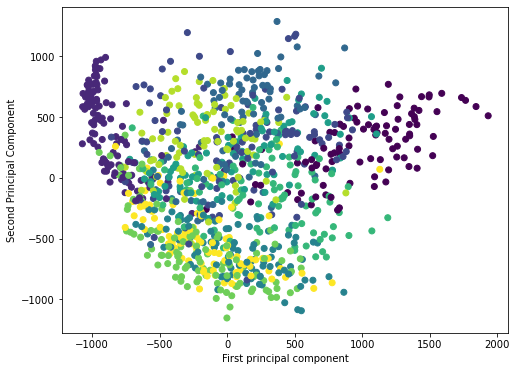

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_samples)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

**Are there any hyper-parameters? If yes, which one(s) did you choose?**.

- So PCA is an unsupervised statistical technique for component reduction and in general the number of components would be a hyperparameter of the model. However, in this specific case, we are trying to do 2D visualization so we don't have any other option than selecting number of components to 2. Therefore, for this specific example there were no hyperparameters.

**Now do the same things with t-SNE instead.**

In [48]:
from sklearn.manifold import TSNE

In [49]:
# You can change this number depending on the speed of your computer.
# Try not to decrease it too much if you still want to get meaningful results.

In [50]:
%%time
# It may take up to a few minutes depending on the speed of the Internet connection, and the speed of your computer.
X_mnist, y_mnist = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X_mnist.shape, y_mnist.shape)

(70000, 784) (70000,)
Wall time: 19.7 s


In [51]:
N = 1000
X_samples = X_mnist[:N]
y_samples = y_mnist[:N]
X_samples.shape

(1000, 784)

In [52]:
y_samples = np.array([int(s) for s in y_samples])

In [53]:
tsne = TSNE(n_components=2)

In [54]:
X_tsne = tsne.fit_transform(X_samples)

In [55]:
X_samples.shape

(1000, 784)

In [56]:
X_tsne.shape

(1000, 2)

Text(0, 0.5, 'Second Principal Component')

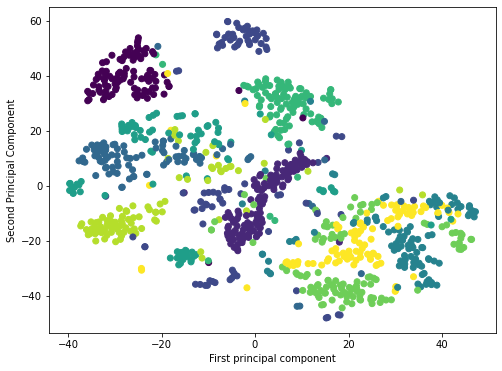

In [57]:
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y_samples)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [58]:
X_tsne

array([[-25.72517  ,  16.732786 ],
       [-28.199326 ,  38.8924   ],
       [ 42.093506 ,  -6.8214526],
       ...,
       [-34.720703 ,  33.524776 ],
       [-19.60649  ,  16.25719  ],
       [ -1.7388067,  36.21056  ]], dtype=float32)

If you want to measure the time one cell takes to be executed, you can use the "IPython magic command" *%%time*.

In [59]:
%%time
# This is an example. This is also a really inefficient implementation of the fibonacci function, you should not do that.

def fibonacci(n):
    if n <= 2:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

fibonacci(33)

Wall time: 628 ms


3524578

**Are there any hyper-parameters? If yes, which one(s) did you choose?**.

- Yes. The most important one being the perplexity. By default it was set to 40 when defining the model (a high value allows the model to focus on global structures). This is an approximatily good value for our dataset (1000 samples). Sometimes an approximation for the perplexity could be N^(1/2), N being the number of samples. Another hyperparameter would be the number of iterations (number of iterations needed for tSNE to converge), which was set to 1000 by default when defining the model.

**Does one algorithm seem to give "better" results than the other? If yes, which one? Why may that be?** 

- Yes. The T-SNE approach clearly offers a better result. The points in each cluster are clearly better delimited in T-SNE than in PCA. In general, PCA is mainly used for dimensionality reduction, not for visualization. To visualize high dimension data, we mostly use T-SNE. 
- While PCA simple maximizes the variance, T-SNE minimizes the divergence between the distribution that measures similarities of the input and a distribution that measures similarities of the corresponding low-dimensional points. T-SNE, however, is computationally heavy and therefore could have some limitations.

## Data generation

We have seen that we are able to identify some structure in the data. Now let's use this structure to generate new samples!

We will generate some handwritten '5s' (you may pick another number if you prefer). First, let's collect all the fives from the dataset.

In [60]:
fives = X_mnist[y_mnist=='5']
fives.shape

(6313, 784)

**Use the PCA implementation from scikit-learn to obtain principal components for the handwritten digits representing '5'. Select the number of components such that they explain a bit more than 50% of the variance.**

Hint: some functions from the scikit-learn PCA implementation may help you.

In [61]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA(n_components=8)

In [63]:
pca.fit(fives)

PCA(n_components=8)

In [64]:
fives_pca = pca.transform(fives)

In [65]:
fives_pca[0]

array([ 180.14194117, -547.19032933,  478.75844487, -347.45739361,
        -27.18327666, -303.97678987,  109.12549775, -119.9186733 ])

In [66]:
fives.shape

(6313, 784)

In [67]:
fives_pca.shape

(6313, 8)

In [68]:
pca.explained_variance_ratio_

array([0.16657166, 0.09591612, 0.07025137, 0.05028951, 0.03848282,
       0.0329922 , 0.0309884 , 0.02471657])

In [69]:
sum(pca.explained_variance_ratio_) #The first 8 components together explain around 51% of the variance

0.5102086610721878

In [179]:
fives_pca[0] #8 principal components of first handwritten 5 from dataset

array([ 180.14194111, -547.19033706,  478.75830359, -347.45727811,
        -27.18223497, -303.99739212,  109.13941971, -120.23792677])

Remember that the principal components should be independant (or more exactly, uncorrelated). We can therefore sample independently along each axis, and combine the sampled vectors to approximately match the distribution of the dataset.

**Generate vectors along the principal components independently, and use them to generate representations of handwritten 5s.**

In [70]:
fives_mean = np.mean(fives_pca,axis=0)

In [71]:
fives_std = np.std(fives_pca,axis=0)

In [72]:
fives_mean #Mean is 0 across each component

array([ 1.63155829e-14, -7.34741483e-14, -5.14138954e-14, -3.34955676e-15,
        8.24468184e-14, -2.71386131e-14,  3.13705800e-14,  7.87978725e-14])

In [73]:
fives_std #Standard Deviation decreases moving from component to component by importance order

array([717.78859534, 544.68045402, 466.14754903, 394.39799869,
       345.00822559, 319.44906885, 309.59618631, 276.49680216])

In [74]:
#Generating new data sample in the new 8 dimension space by keeping the same mean and standard deviation
#for each principal component as that of our original data in the lower dimension space
for i in range(8):
    comp = np.random.normal(fives_mean[i], fives_std[i], 1000).reshape(-1,1) #Gaussian
    if i==0:
        new_sample = comp
    else:
        new_sample = np.concatenate([new_sample,comp],axis=1)

In [75]:
new_sample.shape

(1000, 8)

In [76]:
np.mean(new_sample,axis=0)

array([  7.06808222,  -6.97863561, -37.28333923,   4.99914748,
         2.34081791,  -1.12021655,   5.73943255,  -5.91790149])

In [77]:
np.std(new_sample,axis=0)

array([722.42867701, 555.06917244, 448.80489965, 392.80094677,
       341.93712293, 311.71218752, 299.83931627, 270.3626491 ])

In [78]:
#Now we can use these new points to reconstruct the '5' digits in the original space
#Reconstructing fives
fives_reconstruct = pca.inverse_transform(new_sample)

In [79]:
new_sample.shape

(1000, 8)

In [80]:
fives_reconstruct.shape

(1000, 784)

In [81]:
#Adding the mean
fives_reconstruct += pca.mean_

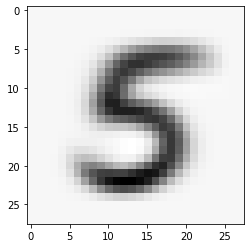

In [82]:
#Checking first reconstructed '5'
img0 = fives_reconstruct[0].reshape(28,28)
plt.imshow(img0, cmap=plt.cm.Greys)
plt.show()

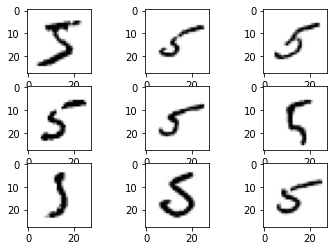

In [83]:
#Plotting original data
for i in range(9):
    plt.subplot(3,3,i+1)
    img0 = fives[i].reshape(28,28)
    plt.imshow(img0, cmap=plt.cm.Greys)

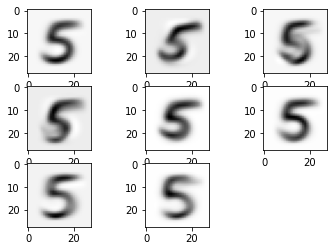

In [84]:
#Plotting reconstructed new data
for i in range(8):
    plt.subplot(3,3,i+1)
    img0 = fives_reconstruct[i].reshape(28,28)
    plt.imshow(img0, cmap=plt.cm.Greys)

**Are all the generated numbers indistinguishable from the original numbers? What may be the reason?**

- We can still see the '5' digits when reconstructing them from the 8 dimension space to the original 784 dimension space. However, we have to consider that we only took 8 components when doing the PCA algorithm, which only gave us 51% of the variance. Therefore these generated numbers are not indistinguishable from the original numbers (they are distinguishable).